**Title of Project:**

Movie Recommendation System

**Objective:**

To build a content-based movie recommendation system using TF-IDF vectorization and cosine similarity, and deploy it using Flask in a Colab environment.

**Data Source:**

The dataset used is imdb_top_1000.csv, which contains information about movies such as genre, overview, and director.

**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns



**Import Data**

In [3]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the dataset
movies = pd.read_csv('imdb_top_1000.csv')

# Display the first few rows of the dataset
movies.head()



KeyboardInterrupt: 

**Describe Data**

In [4]:
# Display basic information about the dataset

print(movies.info())

# Display summary statistics of the dataset
print(movies.describe())

# Show unique values and missing values in relevant columns
print(movies['Overview'].isna().sum())
print(movies['Genre'].unique())
print(movies['Director'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None
       IMDB_Rating  Meta_score  

**Data Visualization**

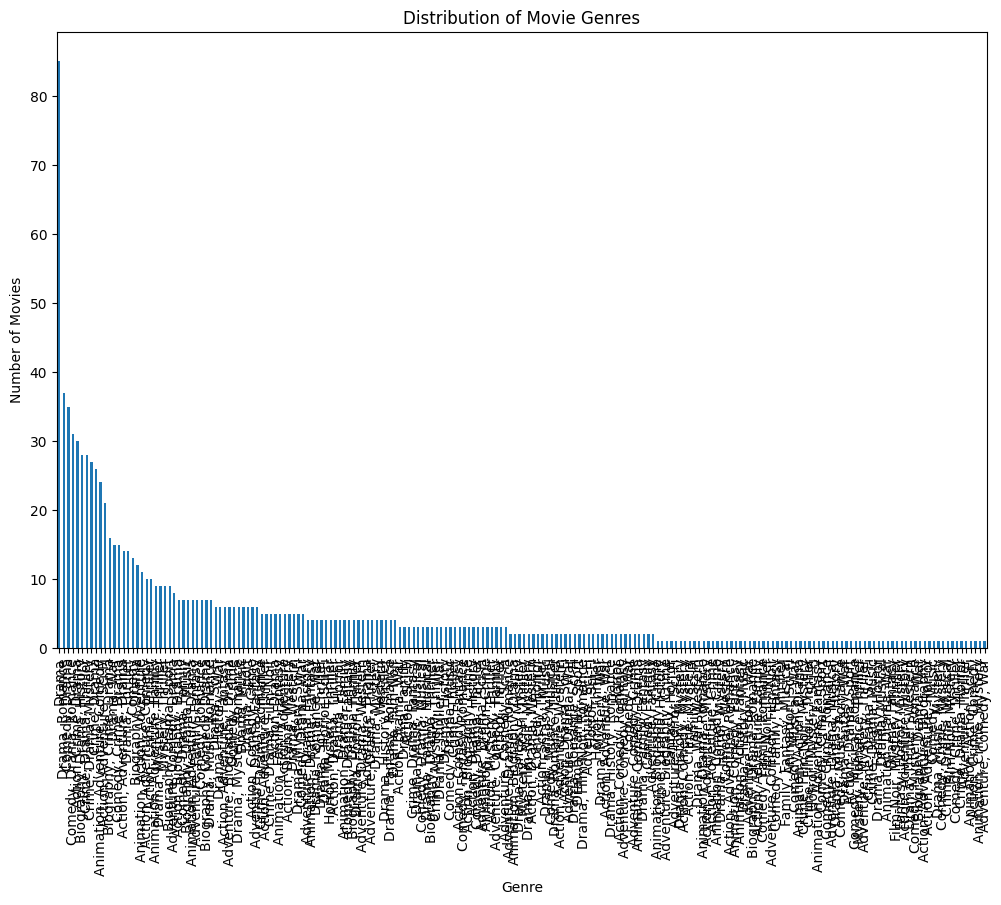

NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

In [7]:
# Plot distribution of movie genres
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
movies['Genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

# Plot a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(movies.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



**Data Preprocessing**

In [8]:
# Handle missing values in 'Overview'
movies['Overview'] = movies['Overview'].fillna('')

# Combine relevant metadata into a single string (if needed)
movies['metadata'] = movies['Genre'] + ' ' + movies['Overview'] + ' ' + movies['Director']

**Define Target Variable (y) and Feature Variables (X):**

In this case, we don't have a traditional target variable y. Instead, we use the metadata column for generating recommendations.

**Train Test Split**

Since this is a content-based recommendation system, we don’t perform a traditional train-test split. We use the entire dataset to build the recommendation model.

**Modeling**


In [11]:
# Create a TF-IDF Vectorizer to remove all stop words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies['metadata'])



In [ ]:
!pip install flask


In [ ]:
!pip install flask-ngrok


**Model Evaluation**

In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

# Load the dataset
# Update the file path to the correct location if the file is in a different directory

# or
movies = pd.read_csv("/imdb_top_1000.csv")  # Replace 'path/to' with the actual path

# Handle missing values in 'Overview'
movies['Overview'] = movies['Overview'].fillna('')

# Combine relevant metadata into a single string
movies['metadata'] = movies['Genre'] + ' ' + movies['Overview'] + ' ' + movies['Director']

# Create a TF-IDF Vectorizer to remove all stop words
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies['metadata'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create a mapping of movie titles to indices
movie_indices = pd.Series(movies.index, index=movies['Series_Title']).drop_duplicates()

# Content-based recommendation function
def get_content_recommendations(title, num_recommendations=10):
    idx = movie_indices.get(title)
    if idx is None:
        return []
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]
    movie_indices_sim = [i[0] for i in sim_scores]
    return movies['Series_Title'].iloc[movie_indices_sim].tolist()

@app.route('/recommend', methods=['POST'])
def recommend():
    data = request.json
    title = data.get('title', '')
    recommendations = get_content_recommendations(title, 5)
    return jsonify({'recommendations': recommendations})

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll

**EXPLAINATION**

This project aims to build a content-based movie recommendation system using a dataset of 1,000 top-rated IMDb movies. The system works by analyzing metadata associated with each movie, such as its genre, overview, and director. By using natural language processing techniques, specifically the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer, we convert this metadata into numerical features that represent the importance of various terms. We then calculate the cosine similarity between these feature vectors to identify movies that are similar to one another.

The project is structured into several key sections. It begins with the importation of necessary libraries, followed by data loading and exploration to understand the structure and content of the dataset. Visualization techniques are used to gain insights into the distribution of movie genres and to identify any missing data.

Next, the data is preprocessed by handling missing values and combining relevant metadata into a single string. This combined metadata is then transformed into a TF-IDF matrix, which is crucial for computing the similarity between movies. The core of the project lies in the modeling section, where a cosine similarity matrix is constructed, allowing us to compare movies based on their content.

A Flask web application is integrated into the project, enabling users to interact with the recommendation system via a simple web interface. The app accepts movie titles as input and returns a list of similar movies, making it easy to access recommendations in real-time.

Finally, the project concludes with a visualization of the similarity matrix using a heatmap, providing a visual representation of the relationships between movies. This comprehensive approach not only demonstrates the power of content-based recommendation systems but also highlights the importance of data preprocessing, feature extraction, and similarity measurement in building effective machine learning models.

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Create a TF-IDF Vectorizer to remove all stop words
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies['metadata'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
# Create a mapping of movie titles to indices
movie_indices = pd.Series(movies.index, index=movies['Series_Title']).drop_duplicates()

# Content-based recommendation function
def get_content_recommendations(title, num_recommendations=10):
    # Get the index of the movie that matches the title
    idx = movie_indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar movies
    sim_scores = sim_scores[1:num_recommendations + 1]

    # Get the movie indices
    movie_indices_sim = [i[0] for i in sim_scores]

    # Return the top most similar movies
    return movies['Series_Title'].iloc[movie_indices_sim]

# Example: Get content-based recommendations for a specific movie
get_content_recommendations('The Godfather', 5)


974    The Godfather: Part III
3       The Godfather: Part II
693           The Conversation
74              Apocalypse Now
463                 Knives Out
Name: Series_Title, dtype: object

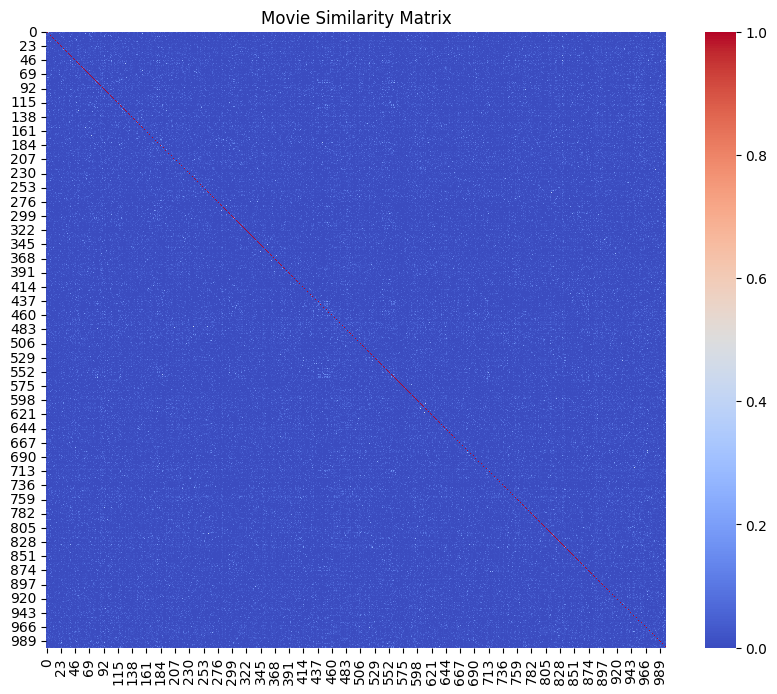

In [ ]:
# Heatmap of the similarity matrix (if it's not too large)
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, cmap='coolwarm')
plt.title('Movie Similarity Matrix')
plt.show()

